In [3]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pickle as pkl

In [138]:
with open('pickles\\Removed_Others_Dialogue.pkl', 'rb') as fl:
    df = pkl.load(fl)
df

,date,title,url,event,location,transcript
0,"May 26, 2020",Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",So ako pati si Bong during my mayorship d...
1,"May 25, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,PRESIDENT RODRIGO ROA DUTERTE: I remember dist...
2,"May 22, 2020",Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","Kindly sit down. [May upuan sila? Okay.], Defe..."
3,"May 19, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,PRESIDENT RODRIGO ROA DUTERTE: Good evening my...
4,"May 12, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"PRESIDENT DUTERTE: Sir, one question. Itong op..."
...,...,...,...,...,...,...
712,"May 09, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,Malacañan Palace,Kindly sit down. Salamat for the courtesy. Fin...
713,"May 08, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Rizal Hall, Malacañan Palace","Maybe after my prepared speech, this is just a..."
714,"May 05, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Isla Ballroom, EDSA Shangri-La, Mandaluyon...",Thank you. Kindly sit down. I’d forego wit...
715,"May 04, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the SMX Convention Center, Davao City",Salamat po. Thank you for your courtesy. You m...


In [140]:
df.reset_index(inplace=True, drop=True)

In [141]:
import re

def clean_transcript(single_str):
    lt_names= ['PRESIDENT RODRIGO DUTERTE:', 'PRESIDENT DUTERTE:', 'PRESIDENT RODRIGO ROA DUTERTE:', 'DUTERTE:', 
               'PRES. DUTERTE:', 'PRRD']
    str_cleaned = single_str
    for nm in lt_names:
        str_cleaned = str_cleaned.replace(nm, ' ')
    str_cleaned = str_cleaned.replace('\xa0', ' ')
    str_cleaned = str_cleaned.replace('\x0c', ' ')
    str_cleaned = str_cleaned.replace('\\', ' ')
    str_cleaned = str_cleaned.replace('—', ' ')
    str_cleaned = str_cleaned.replace('-', ' ')
    str_cleaned = str_cleaned.replace('...', ' ')
    str_cleaned = str_cleaned.replace('…', ' ')
    str_cleaned = str_cleaned.replace('END', ' ')
    str_cleaned = re.sub(r"\[(.*?)\]", ' ', str_cleaned) #remove all that is contained within brackets
    str_cleaned = re.sub(r"\((.*?)\)", ' ', str_cleaned) #remove all that is contained within parentheses
    str_cleaned = re.sub(r'\“(.+?)\”', ' ', str_cleaned) #remove all that is in quatation as he probably quoting someone
    str_cleaned = str_cleaned.replace('‘', ' ')
    str_cleaned = [wrd.lower() for wrd in str_cleaned.split(' ') if wrd != '']
    str_cleaned = ' '.join(str_cleaned)

    return str_cleaned

>We're going to apply the function above to every transcript for cleaning. But before that let's correct the indexing

In [142]:
df.reset_index(inplace=True, drop=True)
df

,date,title,url,event,location,transcript
0,"May 26, 2020",Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",So ako pati si Bong during my mayorship d...
1,"May 25, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,PRESIDENT RODRIGO ROA DUTERTE: I remember dist...
2,"May 22, 2020",Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","Kindly sit down. [May upuan sila? Okay.], Defe..."
3,"May 19, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,PRESIDENT RODRIGO ROA DUTERTE: Good evening my...
4,"May 12, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"PRESIDENT DUTERTE: Sir, one question. Itong op..."
...,...,...,...,...,...,...
700,"May 09, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,Malacañan Palace,Kindly sit down. Salamat for the courtesy. Fin...
701,"May 08, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Rizal Hall, Malacañan Palace","Maybe after my prepared speech, this is just a..."
702,"May 05, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Isla Ballroom, EDSA Shangri-La, Mandaluyon...",Thank you. Kindly sit down. I’d forego wit...
703,"May 04, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the SMX Convention Center, Davao City",Salamat po. Thank you for your courtesy. You m...


>Apply the function

In [143]:
df['transcript'] = df.transcript.map(clean_transcript)
df

,date,title,url,event,location,transcript
0,"May 26, 2020",Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",so ako pati si bong during my mayorship days s...
1,"May 25, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,i remember distinctly very well that noong nap...
2,"May 22, 2020",Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","kindly sit down. , defense secretary delfin lo..."
3,"May 19, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"good evening my countrymen. today is may 19, t..."
4,"May 12, 2020",Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"sir, one question. itong opening, limited move..."
...,...,...,...,...,...,...
700,"May 09, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,Malacañan Palace,kindly sit down. salamat for the courtesy. fin...
701,"May 08, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Rizal Hall, Malacañan Palace","maybe after my prepared speech, this is just a..."
702,"May 05, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Isla Ballroom, EDSA Shangri-La, Mandaluyon...",thank you. kindly sit down. i’d forego with th...
703,"May 04, 2018",Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the SMX Convention Center, Davao City",salamat po. thank you for your courtesy. you m...


>parse the date feature/variable/column as date object

In [144]:
df['date'] = df.date.map(lambda x: x if x.find('_') == -1 else x[:-2]).tolist()

In [145]:
df['date'] = pd.to_datetime(df['date'])

In [146]:
df

,date,title,url,event,location,transcript
0,2020-05-26,Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",so ako pati si bong during my mayorship days s...
1,2020-05-25,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,i remember distinctly very well that noong nap...
2,2020-05-22,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","kindly sit down. , defense secretary delfin lo..."
3,2020-05-19,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"good evening my countrymen. today is may 19, t..."
4,2020-05-12,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"sir, one question. itong opening, limited move..."
...,...,...,...,...,...,...
700,2018-05-09,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,Malacañan Palace,kindly sit down. salamat for the courtesy. fin...
701,2018-05-08,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Rizal Hall, Malacañan Palace","maybe after my prepared speech, this is just a..."
702,2018-05-05,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Isla Ballroom, EDSA Shangri-La, Mandaluyon...",thank you. kindly sit down. i’d forego with th...
703,2018-05-04,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the SMX Convention Center, Davao City",salamat po. thank you for your courtesy. you m...


In [147]:
df.loc[296].transcript

'paglingkod lang, sige mo pakpak diha. i’d like to acknowledge the presence of president gloria arroyo macapagal arroyo; labor and employment secretary silvestre bello iii; foreign affairs secretary alan peter cayetano and the other members of the cabinet; the honorable members of congress, the house of representatives; the officers and employees of the department of labor and employment; akong mga igsuon sa labor sector; mga kauban sa gobyerno; ug akong mga kababayan . can i have the copy again of the executive order? i’d like to repeat the provision of section 2. prohibition against illegal contracting or subtracting. wala’y multiplication og division diri ha. contracting and sub contracting when undertaken to circumvent the workers’ right to security of tenure. self organization and collective bargaining is hereby made pursuant to the 1987 philippine constitution. mao na ni. mao ra ni akong pinaka kaya gyud. isinagad ko na. security of tenure refers to the right of employees not to 

# FIND TERROR IN EVERY TRANSCRIPT

In [60]:
df_contain_error = df[df.transcript.map(lambda x: any('terror' == word for word in x.split(' ')))]

In [16]:
with open('pickles\\Lowered_Removed_Unecc.pkl', 'wb') as fl:
    pkl.dump(df, fl)

In [82]:
for trans in df_contain_error.transcript:
    txt = trans
    indexes= []
    while txt.find('terror') != -1:
        indexes.append(txt.find('terror'))
        txt = txt[indexes[-1]+ len('terror'):]
    for i in indexes:
        left_dot = trans[:i].rfind('.')
        right_dot = trans[i:].find('.')
        print(trans[left_dot:i+ right_dot])
    print()

. apparently, with the migration excuse me a lot of isis leaders in the southeast asia, we will have terrorism
. sabi ko, p***, ako? nilakad ko na nga p**** i** ako pa magbayad diyan

. intensify our focused military operations against communist terrorist groups so that, alongside our operations, we may persuade more of their members to surrender and return to the folds of the law
. and i had to give the warning that if you do that i will order the soldiers and the police to shoot you; and to shoot you dead

. so let me just say, i promise the filipino people, my country that i will not allow political terrorism, oppression, and intimidation
. magdala ka ng baril, makadaan ka ng checkpoint at sabihin mo, hindi ako papara kay governor ako, mayor ako

. sabi ko, let’s go back to the alunan doctrine that no candidate should strut around with bodyguards with long firearms
. kung yan ang paraan lang para magkaroon tayo ng kapayapaan, na peaceful election then do not f*** the system

. ano y

In [65]:
df_contain_bill = df[df.transcript.map(lambda x: any('bill' == word for word in x.split(' ')))]

In [80]:
for trans in df_contain_bill.transcript:
    txt = trans
    indexes= []
    while txt.find('bill') != -1:
        indexes.append(txt.find('bill'))
        txt = txt[indexes[-1]+ len('bill'):]
    for i in indexes:
        print(trans[i - 20:i + 20])
    print()

tate as against the bill of rights. beca

yan ka namin ng 300 billion na hangin pa
rtial law na klaseng gagawin ko akin lan

 must have gathered billions. and ganito
o do sabihin ninyo sa mga tao is just to
inanakit ko lang. but i will just maybe 
ant me, you have to allow me to talk ext
or a few minutes. i want to deliver not 
 kapisanan ng mga brodkaster ng pilipina
peech but rather it sana a talk with you

in events like these the president is al
nt to deliver not a speech but rather it

money. it's in your bill if you care to 
o diyan? ; our newly appointed officials

might end up paying billions in damages.
port then we will take over and i will a
ately after the typhoon because well i h
worried about being here immediately aft
tient person. i usually do my bidding mi
ately after the typhoon because well i h
ems to be alive. ang mayon siguro gusto 

aking yung proposed bill of us senators 

ected more than p61 billion from goccs o
 senate president vicente sotto iii and 
wn. kumus

# Day 2

In [148]:
df.reset_index(drop=True)

,date,title,url,event,location,transcript
0,2020-05-26,Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",so ako pati si bong during my mayorship days s...
1,2020-05-25,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,i remember distinctly very well that noong nap...
2,2020-05-22,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","kindly sit down. , defense secretary delfin lo..."
3,2020-05-19,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"good evening my countrymen. today is may 19, t..."
4,2020-05-12,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"sir, one question. itong opening, limited move..."
...,...,...,...,...,...,...
700,2018-05-09,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,Malacañan Palace,kindly sit down. salamat for the courtesy. fin...
701,2018-05-08,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Rizal Hall, Malacañan Palace","maybe after my prepared speech, this is just a..."
702,2018-05-05,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Isla Ballroom, EDSA Shangri-La, Mandaluyon...",thank you. kindly sit down. i’d forego with th...
703,2018-05-04,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the SMX Convention Center, Davao City",salamat po. thank you for your courtesy. you m...


In [149]:
df.transcript.nunique()

697

In [15]:
grouped_trans = df.groupby('transcript')

In [16]:
multiple = []
for group in grouped_trans.groups:
    if len(grouped_trans.get_group(group)) > 1:
        multiple.append(group)

In [17]:
len(multiple)

4

# DUPLICATES AGAIN

In [18]:
grouped_trans.get_group(multiple[0])

,date,title,url,event,location,transcript
291,2018-05-09,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,During the Presentation of New Generation Curr...,Malacañan Palace,kindly sit down. salamat for the courtesy. fin...
700,2018-05-09,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,Malacañan Palace,kindly sit down. salamat for the courtesy. fin...


In [19]:
df.drop(index=700, inplace=True)
grouped_trans = df.groupby('transcript')

In [20]:
grouped_trans.get_group(multiple[1])

,date,title,url,event,location,transcript
292,2018-05-08,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Oath Taking Ceremony of Newly Promoted General...,"Rizal Hall, Malacañan Palace","maybe after my prepared speech, this is just a..."
701,2018-05-08,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Rizal Hall, Malacañan Palace","maybe after my prepared speech, this is just a..."


In [21]:
df.drop(index=701, inplace=True)
grouped_trans = df.groupby('transcript')

In [22]:
grouped_trans.get_group(multiple[2])

,date,title,url,event,location,transcript
309,2018-04-05,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,"Awarding of Outstanding Farmers, Fisherfolks a...","Rizal Hall, Malacañan Palace",thank you for your courtesy. kindly sit down. ...
690,2018-04-05,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/wp-content/uploads/2018/04...,NaN,"Rizal Hall, Malacañan Palace",thank you for your courtesy. kindly sit down. ...


In [23]:
df.drop(index=690, inplace=True)
grouped_trans = df.groupby('transcript')

In [24]:
grouped_trans.get_group(multiple[3])

,date,title,url,event,location,transcript
293,2018-05-05,Speech of President Rodrigo Roa Duterte durin...,https://pcoo.gov.ph/presidential-speech/speech...,51st Annual Meeting of the Asian Development B...,"EDSA Shangri-La, Mandaluyong City",thank you. kindly sit down. i’d forego with th...
702,2018-05-05,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the Isla Ballroom, EDSA Shangri-La, Mandaluyon...",thank you. kindly sit down. i’d forego with th...


In [25]:
df.drop(index=702, inplace=True)
grouped_trans = df.groupby('transcript')

In [26]:
len(multiple)

4

In [28]:
df.reset_index(drop=True, inplace=True)

# DONE DUPLICATES

In [32]:
df

,date,title,url,event,location,transcript
0,2020-05-26,Excerpts from Speech of President Rodrigo Roa ...,https://pcoo.gov.ph/presidential-speech/excerp...,Meeting with Philippine Army (PA) and Philippi...,"Malago Clubhouse, Malacañang Park, Manila",so ako pati si bong during my mayorship days s...
1,2020-05-25,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,i remember distinctly very well that noong nap...
2,2020-05-22,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,Commencement Exercsies of the Philippine Milit...,"Malago Clubhouse, Malacañang Park, Manila","kindly sit down., defense secretary delfin lor..."
3,2020-05-19,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"good evening my countrymen. today is may 19, t..."
4,2020-05-12,Talk to the People of President Rodrigo Roa Du...,https://pcoo.gov.ph/presidential-speech/talk-t...,On Coronavirus Disease 2019 (COVID-19),Malago Clubhouse in Malacañang,"sir, one question. itong opening, limited move..."
...,...,...,...,...,...,...
696,2018-05-16,Toast Remarks of President Rodrigo Roa Duterte...,https://pcoo.gov.ph/wp-content/uploads/2018/05...,NaN,"the Rizal Hall, Malacañan Palace","your excellency, the honorable prime minister ..."
697,2018-05-16,Joint Press Statement of President Rodrigo Roa...,https://pcoo.gov.ph/wp-content/uploads/2018/05...,NaN,"the Reception Hall, Malacañan Palace","his excellency, hon. prime minister peter o’ne..."
698,2018-05-16,Signing of Joint Declaration on Agriculture Co...,https://pcoo.gov.ph/wp-content/uploads/2018/05...,NaN,"Reception Hall, Malacañan Palace","good evening, your excellencies, ladies and ge..."
699,2018-05-04,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph/wp-content/uploads/2018/05/...,NaN,"the SMX Convention Center, Davao City",salamat po. thank you for your courtesy. you m...


In [33]:
df.transcript.nunique()

701

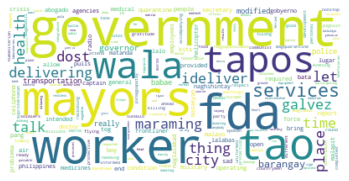

In [251]:
create_word_cloud(df.transcript.values[6])

In [118]:
grouped_year = df.groupby(df.date.map(lambda x: x.year))

# SAVE

In [35]:
with open('pickles\\Lowered_Removed_Unecc.pkl', 'wb') as fl:
    pkl.dump(df, fl)

# LOAD

In [ ]:
with open('pickles\\Lowered_Removed_Unecc.pkl', 'rb') as fl:
    df = pkl.load(fl)

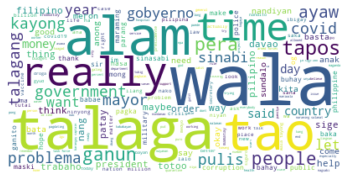

In [191]:
create_word_cloud(grouped_year.get_group(2020).transcript)

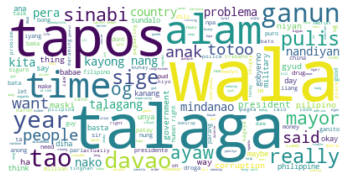

In [195]:
create_word_cloud(grouped_year.get_group(2019).transcript)

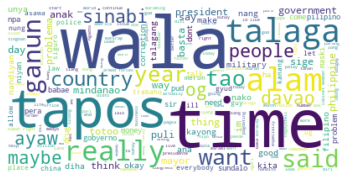

In [196]:
create_word_cloud(grouped_year.get_group(2018).transcript)

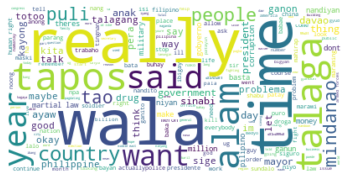

In [252]:
create_word_cloud(grouped_year.get_group(2017).transcript)

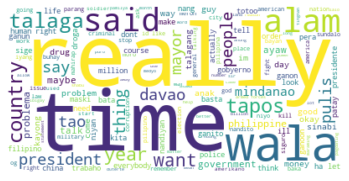

In [198]:
create_word_cloud(grouped_year.get_group(2016).transcript)

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
txt_list = []
for yr in [2016, 2017, 2018, 2019, 2020]:
    txt  = grouped_year.get_group(yr).transcript
    txt = concat_ser(txt)
    txt = remove_stop(txt=txt)
    txt_list.append(txt)

tfidf = TfidfVectorizer(norm=None)
tfidf.fit(txt_list)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm=None, preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

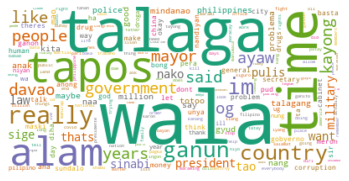

In [218]:
transformed = tfidf.transform(txt_list)
max_val = transformed.max(axis=0).toarray().ravel()
max_val_sorted_index = max_val.argsort()
feature_names = np.array(tfidf.get_feature_names())
dict_frequency = {}

for i in range(len(max_val)):
    word = feature_names[max_val_sorted_index[i]]
    weight = max_val[max_val_sorted_index[i]]
    dict_frequency[word] = weight
create_word_cloud2(dict_frequency)
# ax.set_title(dt)

# MENTION OF BONG over the years

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


with open('Filipino_Stopwords.txt', 'r') as fl:
    fil_stop_words = fl.read().split('\n')

all_stop_words = fil_stop_words
all_stop_words.extend(ENGLISH_STOP_WORDS)

def remove_stop(txt=_, stop_words=all_stop_words):
    '''remove stop words'''
    full_txt = ''
    list_to_remove = [':', ',', '.', '’', '‘', '\'', '„', '?', '!', '‟', '`', '"', '‗']
    for rem in list_to_remove:
        txt = txt.replace(rem, '')
    
    for wrd in txt.replace('\n', ' ').split(' '):
        if not wrd in stop_words:
            full_txt += ' ' + wrd
#             if 'yung' in wrd:
#                 print(wrd)
    return full_txt

def concat_ser(ser):
    '''concatenate the series'''
    return ' '.join(ser.tolist())
    
    
def create_word_cloud(data, ax=plt):
    '''creates a word cloud'''
    if type(data) == pd.Series:
        data = concat_ser(data)
    all_stop_words = fil_stop_words
    all_stop_words.extend(ENGLISH_STOP_WORDS)

    wc = WordCloud(background_color='white', mode='RGB')
    data = remove_stop(all_stop_words, data)
    wc.generate(data)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

def create_word_cloud2(dict_freq, stop_words=all_stop_words, ax=plt):
    wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', random_state=42)
    
    wc.generate_from_frequencies(dict_freq)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')

def count_num_occur(target, words):
    count = 0
    if type(words) == str:
        words = [words]
    for word in words:
        for wrd in target.split(' '):
            if word == wrd:
                count += 1
    return count


import matplotlib.pyplot as plt
from matplotlib import transforms
def rainbow_text(x, y, strings, colors, size, orientation='horizontal',
                 ax=None,  **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c, si in zip(strings, colors, size):
        text = ax.text(x, y, s, color=c, transform=t, fontdict={'fontsize':si}, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

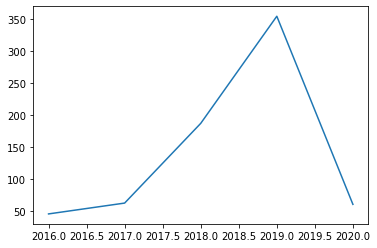

In [261]:
years = [2016, 2017, 2018, 2019, 2020]

count = []
for yr in years:
    txt = grouped_year.get_group(yr).transcript
    txt = concat_ser(txt)
    txt = remove_stop(txt=txt)

    count.append(count_num_occur(txt, ['bong']))
    
plt.plot(years, count)

In [266]:
np.array(count).mean()

141.8

<IPython.core.display.Javascript object>


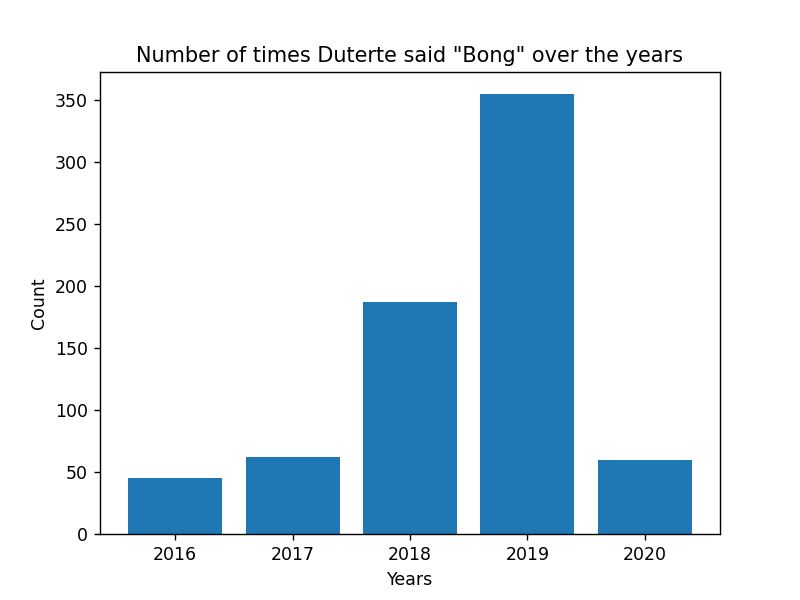

Text(0.5, 1.0, 'Number of times Duterte said "Bong" over the years')

In [268]:
plt.bar(years, count)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Number of times Duterte said "Bong" over the years')

# MENTION Bong over the months

In [39]:
grouped_months = df.groupby(df.date.map(lambda x: (x.year, x.month)))

In [40]:
month_occur = []
for group in grouped_months.groups:
    txt = grouped_months.get_group(group).transcript
    txt = concat_ser(txt)
    txt = remove_stop(txt=txt)
    month_occur.append(count_num_occur(txt, ['bong']))

In [43]:
month = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
group_name = []
for group in grouped_months.groups.keys():
    group_name.append(f'{group[0]}, {month[group[1]-1]}')

# 1.

In [111]:
freq_april_2019

71

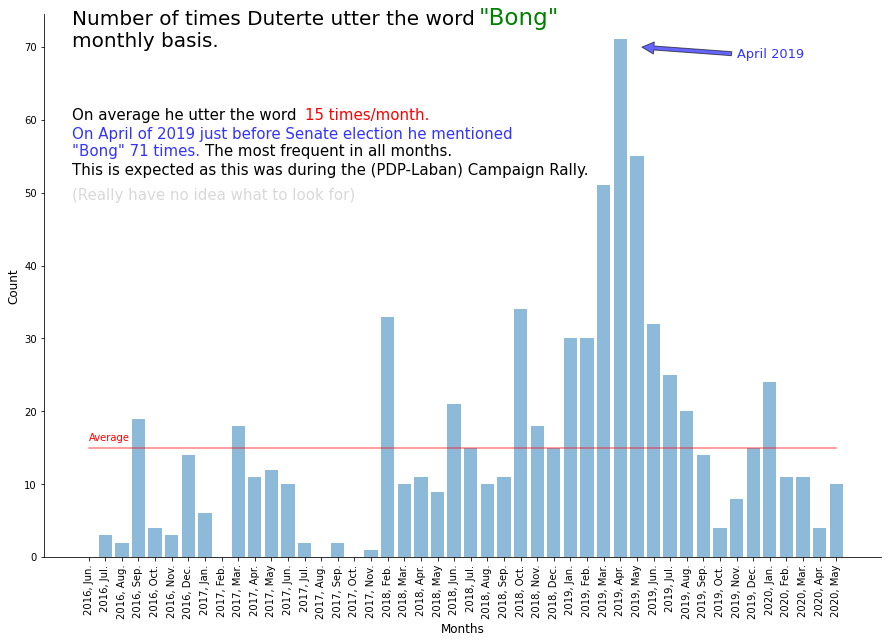

In [119]:
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.bar(range(len(month_occur)), month_occur, alpha=0.5)
plt.plot(range(len(month_occur)), np.full((len(month_occur)), 15), color='red', alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':12})
plt.xlabel('Months', fontdict={'fontsize':12})

plt.xticks(range(len(month_occur)), group_name, rotation=90)
plt.text(-1, 70, 'Number of times Duterte utter the word    \nmonthly basis.',fontdict={'fontsize': 20})
plt.text(23.5, 73, '"Bong"',  fontdict={'fontsize':23, 'color':'green'})

# words = ['Number of times Duterte utter the word\nmonthly basis.', '"Bong"']
# colors = ['black', 'green']
# rainbow_text(-1, 65, strings=words, colors=colors, fontdict={'fontsize': 20})

freq_april_2019 = month_occur[list(grouped_months.groups.keys()).index((2019, 4))]
average = np.array(month_occur).mean()

plt.text(-1, 60, 'On average he utter the word', fontdict={'fontsize':15})
plt.text(-1, 55,f'On April of 2019 just before Senate election he mentioned \n"Bong" {freq_april_2019} times.', 
         fontdict={'fontsize':15, 'color':'blue', 'alpha':0.8})
plt.text(7, 55,'The most frequent in all months.', fontdict={'fontsize':15})
plt.text(-1, 52.5, 'This is expected as this was during the (PDP-Laban) Campaign Rally.', fontdict={'fontsize':15})
plt.text(13, 60, f'{int(average)} times/month.', fontdict={'fontsize':15, 'color':'red'})
plt.text(-1, 49, '(Really have no idea what to look for)', fontdict={'fontsize':15, 'color':'grey', 'alpha':0.3})


# plt.text()
plt.text(0, 16, 'Average', color='red')
xy_largest = (list(grouped_months.groups.keys()).index((2019, 4)) + 1, 70)
plt.annotate('', xy=xy_largest, xytext=(xy_largest[0]+6, 69),
            arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.6), )
plt.text(39, 68.5, 'April 2019', fontdict={'fontsize':13, 'color':'blue', 'alpha':0.8})
#temps
sns.despine()
plt.savefig('Bong_month.png')
plt.show()


In [98]:
month_occur[list(grouped_months.groups.keys()).index((2019, 4))]

71

In [77]:
def get_index(target, groups):
    for i, key in enumerate(grouped_month.groups.keys()):
        if key == (2019, 4):
            return i

array([2016,    6])

# 2.

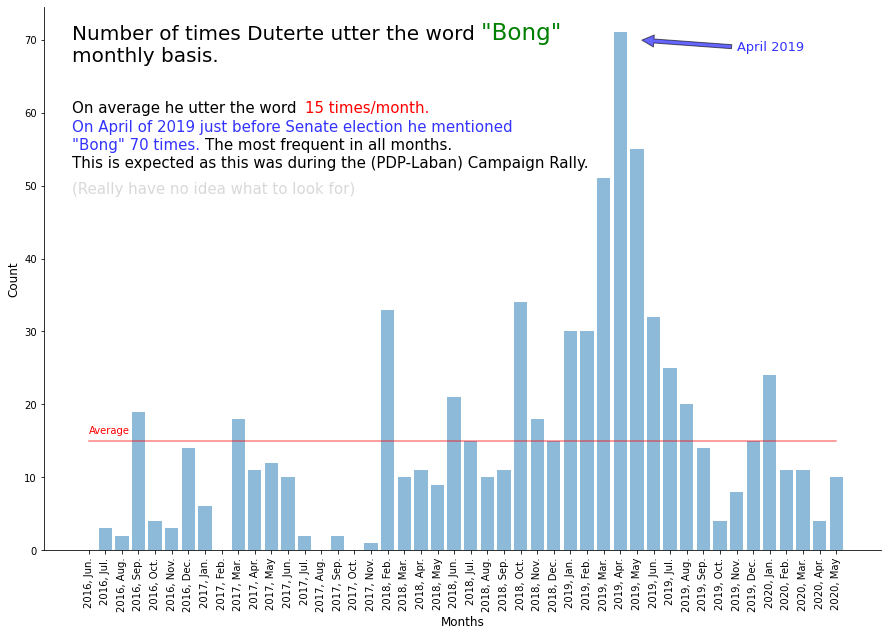

In [49]:
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.bar(range(len(month_occur)), month_occur, alpha=0.5)
plt.plot(range(len(month_occur)), np.full((len(month_occur)), 15), color='red', alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':12})
plt.xlabel('Months', fontdict={'fontsize':12})

plt.xticks(range(len(month_occur)), group_name, rotation=90)
rainbow_text(-1, 70, ['Number of times Duterte utter the word', '"Bong"'], 
                      colors=['black', 'green'], size=[20, 23])
plt.text(-1, 67,'monthly basis.', fontdict={'fontsize': 20})


plt.text(-1, 60, 'On average he utter the word', fontdict={'fontsize':15})
plt.text(-1, 55,'On April of 2019 just before Senate election he mentioned \n"Bong" 70 times.', 
         fontdict={'fontsize':15, 'color':'blue', 'alpha':0.8})
plt.text(7, 55,'The most frequent in all months.', fontdict={'fontsize':15})
plt.text(-1, 52.5, 'This is expected as this was during the (PDP-Laban) Campaign Rally.', fontdict={'fontsize':15})
plt.text(13, 60, '15 times/month.', fontdict={'fontsize':15, 'color':'red'})
plt.text(-1, 49, '(Really have no idea what to look for)', fontdict={'fontsize':15, 'color':'grey', 'alpha':0.3})


# plt.text()
plt.text(0, 16, 'Average', color='red')
xy_largest = (list(grouped_months.groups.keys()).index((2019, 4)) + 1, 70)
plt.annotate('', xy=xy_largest, xytext=(xy_largest[0]+6, 69),
            arrowprops=dict(facecolor='blue', shrink=0.05, alpha=0.6), )
plt.text(39, 68.5, 'April 2019', fontdict={'fontsize':13, 'color':'blue', 'alpha':0.8})
#temps
sns.despine()
plt.savefig('Bong_month.png')
plt.show()


In [3]:
with open('pickles\\Lowered_Removed_Unecc.pkl', 'rb') as fl:
    df = pkl.load(fl)

# KILL vs HEALTH vs EDUCATION

In [51]:
full_txt = concat_ser(df.transcript)
full_txt = remove_stop(txt=full_txt)

count_kalusugan = count_num_occur(full_txt, 'kalusugan')
count_health = count_num_occur(full_txt, 'health')

count_edukasyon = count_num_occur(full_txt, 'edukasyon')
count_education = count_num_occur(full_txt, 'education')

count_patayin = count_num_occur(full_txt, 'patayin')
count_kill = count_num_occur(full_txt, 'kill')

In [377]:
%matplotlib inline

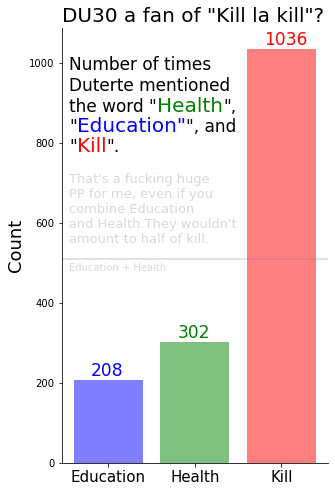

In [203]:
words = ['Education', 'Health', 'Kill']
counts = [count_education, count_health, count_kill]
colors= ['blue', 'green','red']

plt.figure(figsize=(5, 8))
plt.bar(range(len(counts)), counts, color=colors, alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':18})
plt.xticks(range(len(counts)), words, size=15)

#show number
show_number(words, counts, x_offset=-0.2, y_offset=+10, colors=colors, fontdict={'fontsize':17})

#Text Title
plt.text(-0.45, 930, 'Number of times\nDuterte mentioned',
        fontdict={'fontsize':17})
rainbow_text(-0.45, 878, ['the word "', 'Health',  '",'], colors=['black', 'green', 'black'], size=[17, 20, 17])
rainbow_text(-0.45, 828, ['"', 'Education"', '", and'], colors=['black', 'blue', 'black'],  size=[17, 20, 17])
rainbow_text(-0.45, 778, ['"', 'Kill', '".'], colors=['black', 'red', 'black'], size=[17, 20, 17])


plt.text(-0.45,550, 'That\'s a fucking huge \nPP for me, even if you \ncombine Education \nand Health.\
They wouldn\'t \namount to half of kill.', fontdict={'fontsize':13, 'color':'grey', 'alpha':0.3})
plt.title('DU30 a fan of "Kill la kill"?', loc='left', fontdict={'fontsize':20, 'color':'black'})
plt.text(-0.45, counts[0] + counts[1]- 30, 'Education + Health', fontdict={'color':'grey'}, alpha=0.3)

plt.axhline(y=counts[0] + counts[1], color='grey', linestyle='-', alpha=.3)
sns.despine()
plt.gcf().subplots_adjust(left=0.16)
plt.savefig('pictures\\Health_vs_Kill.png')
plt.show()

In [153]:
def show_number(words, counts, x_offset=0, y_offset=0, ax=plt, colors=None, **kwargs):
    if colors:
        if 'fontdict' in kwargs:
            font_val = kwargs['fontdict']
            del kwargs['fontdict']
            
        for i, (count, col) in enumerate(zip(counts, colors)):
            font_val['color'] = col
            ax.text(i+x_offset, count+y_offset, count, fontdict=font_val, **kwargs )
            del font_val['color']
    else:
        for i, count in enumerate(counts):
            ax.text(i+x_offset, count+y_offset, count, **kwargs)

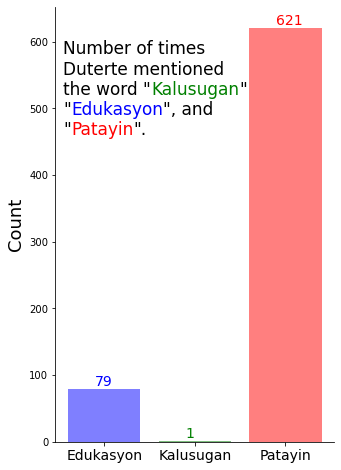

In [161]:
words = ['Edukasyon', 'Kalusugan', 'Patayin']
counts = [count_edukasyon, count_kalusugan, count_patayin]
colors = ['blue', 'green', 'red']


plt.figure(figsize=(5, 8))
plt.bar(range(len(words)), counts, color=colors, alpha=0.5)

plt.xticks(range(len(words)), words, size=14)
plt.ylabel('Count', fontdict={'fontsize':18})
show_number(words, counts, x_offset=-0.1, y_offset=5, colors=colors, fontdict={'fontsize':14})

#Text title
plt.text(-0.45, 550, 'Number of times \nDuterte mentioned', fontdict={'fontsize':17})
rainbow_text(-0.45, 520, ['the word "', 'Kalusugan', '"'], size=[17, 17, 17], 
             colors=['black', 'green', 'black'])
rainbow_text(-0.45, 490, ['"', 'Edukasyon', '", and'], size=[17, 17, 17],
            colors=['black', 'blue', 'black'])
rainbow_text(-0.45, 460, ['"', 'Patayin', '".'], size=[17, 17, 17],
            colors=['black', 'red', 'black'])
# ranbow_text()

sns.despine()
plt.show()

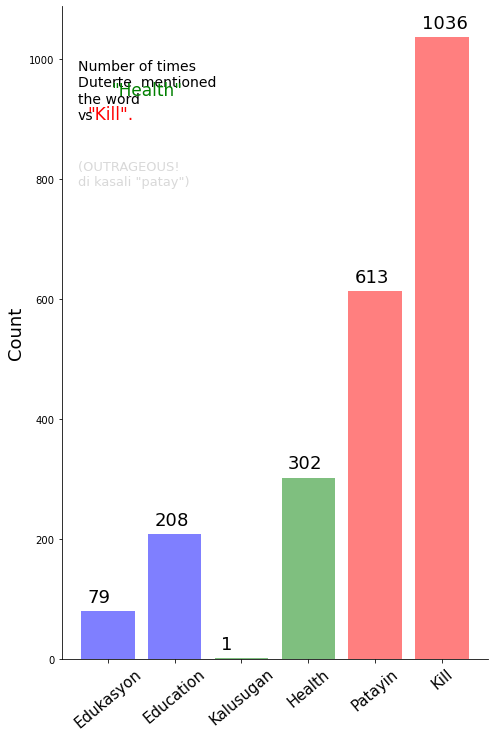

In [41]:
words = ['Edukasyon', 'Education', 'Kalusugan', 'Health', 'Patayin', 'Kill']
counts = [count_edukasyon, count_education, count_kalusugan, count_health, count_patayin, count_kill]
colors = ['blue', 'blue', 'green', 'green', 'red', 'red']

plt.figure(figsize=(8, 12))
plt.bar(range(len(words)), counts, color=colors, alpha=0.5)
plt.ylabel('Count', fontdict={'fontsize':18})
plt.xticks(range(len(words)), words, size=15, rotation=40)

show_number(words, counts,-0.3, 15, fontdict={'fontsize':18})

plt.text(-0.45, 900, 'Number of times\nDuterte  mentioned \nthe word  \nvs',
        fontdict={'fontsize':14})
plt.text(0.055,939, '"Health"', fontdict={'fontsize':17, 'color':'green'})
plt.text(-0.30, 899, '"Kill".', fontdict={'fontsize':17, 'color':'red'})
plt.text(-0.45, 790, '(OUTRAGEOUS! \ndi kasali "patay")', 
         fontdict={'fontsize':13, 'color':'grey', 'alpha':0.3})
sns.despine()
plt.gcf().subplots_adjust(left=0.16)
# plt.savefig('pictures\\Health_vs_Kill.png')
plt.show()

# Word nigg in his dialogue

In [133]:
df[df.transcript.map(lambda x: 'n***' in x)]

,date,title,url,event,location,transcript
224,2018-09-20,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,12th Activation Anniversary of Mechanized Infa...,"Capas, Tarlac",kindly sit down. thank you for your courtesy l...
258,2018-07-10,Speech of President Rodrigo Roa Duterte during...,https://pcoo.gov.ph/presidential-speech/speech...,"National Micro, Small and Medium Enterprise (M...","ASEAN Convention Center, Clark Freeport Zone, ...",salamat po. kindly sit down and thank you for ...
571,2017-05-19,Speech of President Rodrigo Roa Duterte during...,http://pcoo.gov.ph//speech-of-president-rodrig...,NaN,"Function Room 1, SMX Convention Center, Lanang...",\nkindly sit down. salamat po.\nassistant secr...


In [136]:
df.loc[224].transcript.find('n***')

4400

In [137]:
df.loc[224].transcript[4400:]

'n****s*** sila ni bolton. well he is really a very far right yan sa america, bata ni trump and he has criticized ang icc. pero ngayon na lang but if you’d notice hindi naman ako nagyayabang, tayo yung una at hindi talaga ako pumayag bin****s*** ko sabi ko p****** i** ninyo. i said do not f*** with my country you know. mas marunong pa kayo kung anong gawain sa problema namin. tutal when the day is done, at the end of the day, kung magkal*****l***** ang pilipinas, itong mga y*** na ito wala naman silang pakialam. they might just send aids and everything. kaya sabi ko hindi talaga ako nagsisi. i never regretted p****** i** ko yung presidente nila at lahat na because i think just meager knowledge of law. hindi naman ako bright as in bright talaga. brightbright lang kagaya lang gyud sa inyo para lang makalusot 7575, iskolariskolar, hindi naman kaya ng utak. i’m just as ordinary as you, but i said there’s always a time when you have to defend your country. that’s why gawain lang ninyo ang t

In [ ]:
for trans in df.transcript:
    txt = 